In [1]:
import numpy as np
import random
import pollution
import matplotlib.pyplot as plt
import matplotlib
from tqdm import trange
import tqdm
import os
import imageio
import math
from pollution import Agent
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.colors as colors
import networkx as nx
import os
import math
import matplotlib.ticker as mtick

font = {        'size'   : 20}
mpl.rc('font', **font)

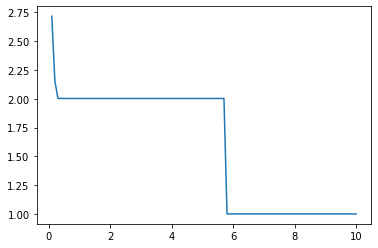

In [29]:
def P(x,R=10):
    if np.abs(x)<=1:
        return 1
    elif np.abs(x)<=R:
        return x**(-2)
    else:
        return 0

def m_cost(x,mu=1):
    if x<1:
        return mu*(1-x)
    else:
        return mu*(x-1)

def clean(x,phi=5):
    if (x>=0) & (x<=2):
        return phi
    else:
        return 0
    
def total_cost(x,mu=1,phi=5,R=10):
    return P(x,R=R)+m_cost(x,mu=mu)+clean(x,phi=phi)

def min_under_mu(mu):
    x=np.linspace(-20,20,10000)
    y= np.array([total_cost(x[i],mu=mu) for i in range(len(x))])
    return x[np.argmin(y)]

mu = np.linspace(0.1,10,100)
x_0 = [min_under_mu(mu[i]) for i in range(len(mu))]
y = [total_cost(x_0[i]) for i in range(len(x_0))]
plt.plot(mu,x_0)
# plt.yscale('log')

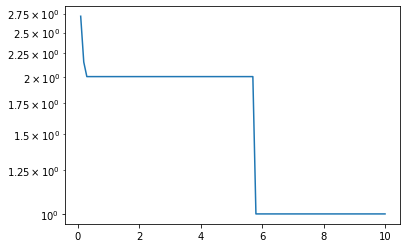

In [30]:
plt.plot(mu,x_0)
plt.yscale('log')
plt.plot()

(-5.0, 10.0)

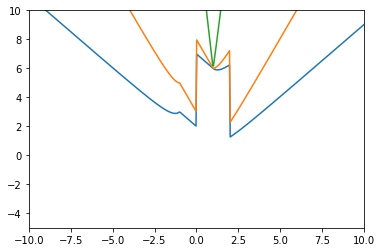

In [17]:
x= np.linspace(-20,20,1000)
y1= [total_cost(X,mu=1) for X in x]
y2= [total_cost(X,mu=2) for X in x]
y10= [total_cost(X,mu=10) for X in x]
plt.plot(x,y1)
plt.plot(x,y2)
plt.plot(x,y10)
plt.xlim([-10,10])
plt.ylim([-5,10])

In [2]:
def points_within_range(position,radius,size=1):
    return [(x%size,y%size) for x in range(position[0]-radius,
                                    position[0]+radius+1)
            for y in range(position[1]-radius,
                            position[1]+radius+1)
            if np.sqrt((x-position[0])**2+(y-position[1])**2) <= radius]

# GIFs and clustering examples

In [5]:
path = 'Animations/Social dilemma/'
T=200
phi = 3
M = 5
L=50
f = 2.5
g = 2.5
world = pollution.World(L=L,N=50,D=30,phi=phi,M=M,f=f,g=g,M_nu=M)

Pbar = np.zeros(T+1)
Phat = np.zeros(T+1)

for i in trange(T+1):
    fig,ax=plt.subplots(figsize=(6,6))
    ax.imshow(world.pollution_grid,cmap='bwr',vmin=-3,vmax=3) 
#     Pbar[i] = world.spatial_avg()
    Phat[i] = world.per_capita()
    ax.axes.xaxis.set_visible(False)
    ax.axes.yaxis.set_visible(False)
    fig.savefig(path+f'{i}.jpg',bbox_inches='tight')
    plt.close()
    world.step()

i=T+1
with imageio.get_writer(path+f'Payoff M={M}phi={phi}.gif', mode='I') as writer:
    for j in range(i):
        image = imageio.imread(path+f'{j}.jpg')
        writer.append_data(image)
        os.remove(path+f'{j}.jpg')

100%|█████████████████████████████████████████| 201/201 [00:16<00:00, 12.39it/s]
/home/jbara/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning dissapear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.


In [12]:
T=200
phi = 5
M = 5
L=50
world = pollution.World(L=L,N=50,D=10)

In [27]:
a = world.agents[2]
print(a.position)
print(world.lattice_sites[a.position])

neighbourhood = [pt for pt in
                 points_within_range(a.position,
                                     a.imitate_radius,
                                     world.size)
                 if world.lattice_sites[pt]>0]
print(neighbourhood)

neighbour_pollution = {world.lattice_sites[pt]:world.pollution_grid[pt]
                                for pt in neighbourhood}
print(neighbour_pollution)

best_neighbour = min(neighbour_pollution,key=neighbour_pollution.get)
print(best_neighbour)
print(world.return_agent(best_neighbour)[0].type)

(29, 7)
3.0
[(29, 6), (29, 7)]
{29.0: -4.0, 3.0: -4.0}
29.0
c


# Game Theory Conditions

In [6]:
phi = 1
R = 5
r = np.linspace(0,8,1000)
defection_dom = (1+phi)*np.ones_like(r)
social_opt = 2*(1+phi)*np.ones_like(r)
social_opt[(r>1)] = defection_dom[(r>1)] + 1/r[(r>1)]**2
social_opt[r>R] = defection_dom[r>R]

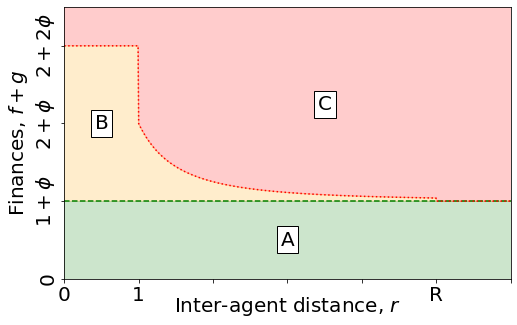

In [118]:
fig,ax=plt.subplots(figsize=(8,5))
bbox = dict(facecolor='white')
ax.plot(r,defection_dom,c='g',ls='--')
ax.plot(r,social_opt,c='r',ls=':')
ax.set_xlim([0,R+1])
ax.set_ylim([phi,2.5+2*phi])

# ax.set_xticks([1,R])
# ax.set_yticks([1+phi,2+2*phi])
# ax.set_xticklabels([1,'R'])
# ax.set_yticklabels([r'$1+\phi$',r'$2(1+\phi)$'],rotation=90,va='center')

ax.set_yticks([1,2,3,4])
ax.set_yticklabels([0,r'$1+\phi$',r'$2+\phi$',r'$2+2\phi$'],rotation=90,va='center')

ax.set_xticks([0,1,2,3,4,5,6])
ax.set_xticklabels([0,1,'','','','R',''])

ax.set_xlabel('Inter-agent distance, $r$')
ax.set_ylabel('Finances, $f+g$')
ax.xaxis.labelpad = -10

ax.fill_between([0,8],[1+phi]*2,color='green',alpha=0.2)
ax.fill_between(r,social_opt,[4+2*phi]*len(r),color='red',alpha=0.2)
ax.fill_between(r,social_opt,defection_dom,color='orange',alpha=0.2)

ax.text((1+R)/2,phi+0.5,'A',horizontalalignment='center',
        verticalalignment='center',bbox=bbox)
ax.text(0.5,1.5*(1+phi),'B',horizontalalignment='center',
        verticalalignment='center',bbox=bbox)
ax.text((2+R)/2,(4+3*phi)/2-0.25,'C',horizontalalignment='center',
        verticalalignment='center',bbox=bbox)

fig.savefig('Phase diagram.png',bbox_inches='tight')

# Phat

In [28]:
N = 50
R = 5
L = 50
M = [2,3,4,5,6,10]
D = [10,20,30,40]
Phi = [0.5,1,2,3,4,5]
T=200
Runs = 10
P_hat1 = np.loadtxt('Phat Experiments/Experiment All/Phat_2-6.csv').reshape(50,len(M),len(D),len(Phi),T+1)
P_hat2 = np.loadtxt('CC Experiments/Experiment 12/Phat.csv').reshape(50,3,len(D),T+1)
P_hat_phi5 = np.concatenate((P_hat1[:,:-1,:,5,:],P_hat2,P_hat1[:,-1:,:,5,:]),axis=1)

In [29]:
print(P_hat1[:,:,:,5,:].shape)
print(P_hat2.shape)
print(P_hat_phi5.shape)

(50, 6, 4, 201)
(50, 3, 4, 201)
(50, 9, 4, 201)


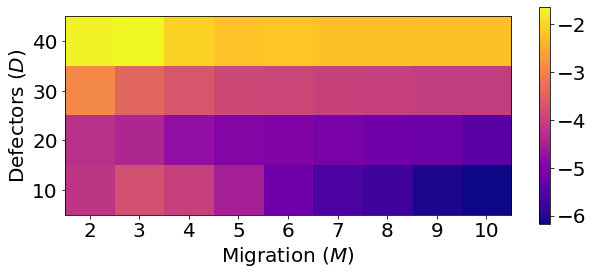

In [31]:
phi = 5
phi_index = {0.5:0,1:1,2:2,3:3,4:4,5:5}

fig=plt.figure(figsize=(10,8))#,gridspec_kw={'hspace':0})
ax=plt.gca()
# for i,phi in enumerate(Phi):
#     trunc_cmap = truncate_colormap(plt.get_cmap('jet'),minval=0,maxval=6.8/12.4)
# P_hat_final = P_hat[:,:,:,phi_index[phi],-50:].mean(axis=3).mean(axis=0)-P_hat[:,:,:,phi_index[phi],0].mean(axis=0)
P_hat_final = P_hat_phi5[:,:,:,-50:].mean(axis=3).mean(axis=0) - P_hat_phi5[:,:,:,0].mean(axis=0)
vmin = P_hat_final.min()
vmax = P_hat_final.max()
im=ax.imshow(np.flip(P_hat_final.transpose(),axis=0),
                        cmap='plasma',
                        vmin=vmin,
                        vmax=vmax)
# ax.set_title("Final Change in Per-Capita Pollution ($\Delta\hat{P}$)")

M=[m for m in range(2,11)]
ax.set_ylabel("Defectors ($D$)")
ax.set_yticks([0,1,2,3])
ax.set_yticklabels(D[::-1])
ax.set_xlabel("Migration ($M$)")
ax.set_xticks(range(len(M)))
ax.set_xticklabels(M)

cbar = plt.colorbar(im, shrink=0.5)
# cbar.set_label("$\Delta\hat{P}$")
# cbar.ax.tick_params(labelsize=15) 
# if label=="Agents in Compounds":
#     vals = cbar.get_ticks()
#     cbar.set_ticks(vals)
#     cbar.set_ticklabels(['{:,.0%}'.format(x) for x in vals])
# fig.suptitle(label,fontsize=25)
    
# fig.tight_layout()

fig.savefig(f"Manuscript/Phat, phi {phi},M2-10.png",bbox_inches='tight')

## timeseries

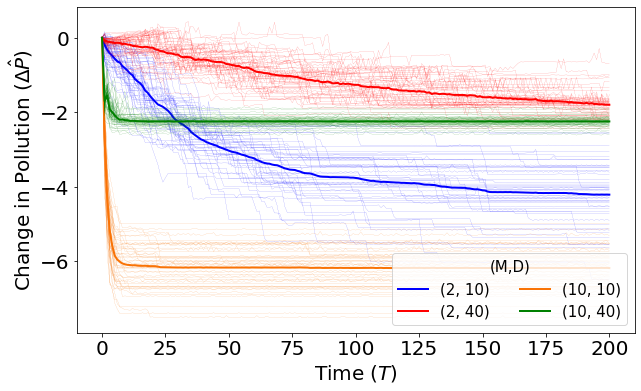

In [63]:
pairs = [(2,10),(2,40),(10,10),(10,40)] #(M,D)
colours = ['b','r','xkcd:orange','green']
fig,ax = plt.subplots(figsize=(10,6))
for i,pair in enumerate(pairs):
    for j in range(50):
        plt.plot(P_hat1[j,M.index(pair[0]),D.index(pair[1]),5,:]-P_hat1[j,M.index(pair[0]),D.index(pair[1]),5,0],
                 color=colours[i],lw=0.1)
    plt.plot(P_hat1[:,M.index(pair[0]),D.index(pair[1]),5,:].mean(axis=0)
             -P_hat1[:,M.index(pair[0]),D.index(pair[1]),5,0].mean(axis=0),
             label=pair,color=colours[i],lw=2)
plt.xlabel("Time ($T$)")
plt.ylabel("Change in Pollution ($\Delta\hat{P}$)")
legend=plt.legend(title='(M,D)',loc='lower right',ncol=2,fontsize=15)
plt.setp(legend.get_title(),fontsize=15)
fig.savefig(f"Manuscript/Timeseries.png",bbox_inches='tight')

# CC

In [18]:
N = 50
R = 5
L = 50
M = [2,3,4,5,6,7,8,9,10]
D = [10,20,30,40]
Phi = [0.5,1,2,3,4,5]
T=200
Runs = 10
# CC7 = np.loadtxt('CC Experiments/Experiment 7/CC.csv').reshape(10,len(M),len(D),len(Phi),2)
# CC8 = np.loadtxt('CC Experiments/Experiment 8/CC.csv').reshape(10,len(M),len(D),len(Phi),2)
# CC9 = np.loadtxt('CC Experiments/Experiment 9/CC.csv').reshape(10,len(M),len(D),len(Phi),2)
# CC10 = np.loadtxt('CC Experiments/Experiment 10/CC.csv').reshape(10,len(M),len(D),len(Phi),2)
# CC11 = np.loadtxt('CC Experiments/Experiment 11/CC.csv').reshape(10,len(M),len(D),len(Phi),2)
# CC = np.concatenate((CC7,CC8,CC9,CC10,CC11),axis=0)
# CC.shape

CC1 = np.loadtxt('CC Experiments/Experiment All/CC.csv').reshape((50,6,len(D),len(Phi),2))
CC2 = np.loadtxt('CC Experiments/Experiment 12/CC.csv').reshape((50,3,len(D),2))
CC = np.concatenate((CC1[:,:-1,:,5,:],CC2,CC1[:,-1:,:,5,:]),axis=1)
CC.shape

(50, 9, 4, 2)

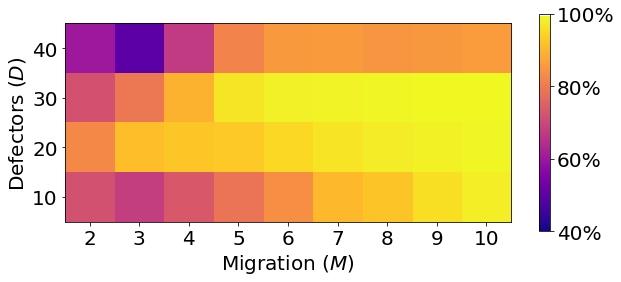

In [27]:
label='Agents in Compounds'
phi = 5

phi_index = {0.5:0,1:1,2:2,3:3,4:4,5:5}
if label == 'Number of Compounds':
    index = 0
elif label == 'Size of Compounds':
    index = 1
else:
    index = 2
if index < 2:
#     vmin = CC[:,:,:,phi_index[phi],index].mean(axis=0).min()
#     vmax = CC[:,:,:,phi_index[phi],index].mean(axis=0).max()
    vmin = CC[:,:,:,index].mean(axis=0).min()
    vmax = CC[:,:,:,index].mean(axis=0).max()
else:
#     AC = CC[:,:,:,phi_index[phi],0]*CC[:,:,:,phi_index[phi],1]/N
    AC = CC[:,:,:,0]*CC[:,:,:,1]/N
    vmin = AC.mean(axis=0).min()
    vmax = AC.mean(axis=0).max()
fig=plt.figure(figsize=(10,8))#,gridspec_kw={'hspace':0})
ax=plt.gca()
vmin=0.4
# for i,phi in enumerate(Phi):
#     trunc_cmap = truncate_colormap(plt.get_cmap('jet'),minval=0,maxval=6.8/12.4)
if index < 2:
    im=ax.imshow(np.flip(CC[:,:,:,phi_index[phi],index].mean(axis=0).transpose(),axis=0),
                            cmap='plasma',
                            vmin=vmin,
                            vmax=vmax)
else:
    im=ax.imshow(np.flip(AC.mean(axis=0).transpose(),axis=0),
                            cmap='plasma',
                            vmin=vmin,
                            vmax=vmax)
# ax.set_title(label+f', $\phi=${phi}')

ax.set_ylabel("Defectors ($D$)")
ax.set_yticks([0,1,2,3])
ax.set_yticklabels(D[::-1])
ax.set_xlabel("Migration ($M$)")
ax.set_xticks(range(len(M)))
ax.set_xticklabels(M)

cbar = plt.colorbar(im, shrink=0.5)
# cbar.ax.tick_params(labelsize=15) 
if label=="Agents in Compounds":
    vals = cbar.get_ticks()
    cbar.set_ticks(vals)
    cbar.set_ticklabels(['{:,.0%}'.format(x) for x in vals])
# fig.suptitle(label,fontsize=25)
    
# fig.tight_layout()

fig.savefig(f"Manuscript/CC {label}, phi {phi},M2-10.png",bbox_inches='tight')

# illustration of model

In [177]:
N=2
D=1
L=50
R = 10
M = 15
phi=1
x_D,y_D=15,15
x_C,y_C=34,34
agents = [Agent(label=1,position=(x_D,y_D),type='d',phi=phi,M=M,R=R),
         Agent(label=2,position=(y_C,y_C),type='c',phi=phi,M=M,R=R)]
world = pollution.World(L=L,N=N,D=D,agents=agents,phi=phi,R=R,M=M)

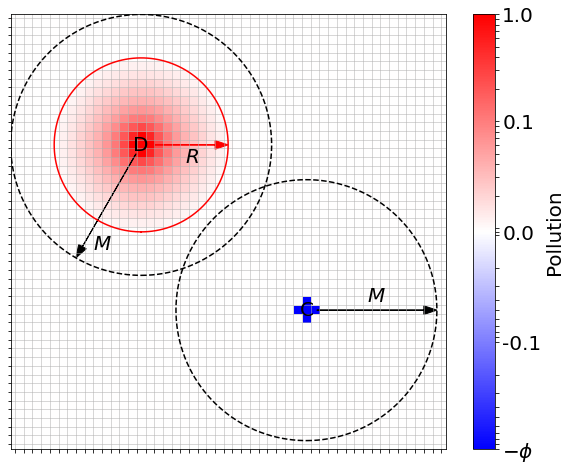

In [186]:
fig=plt.figure(figsize=(10,8))
ax=plt.gca()
ax.set_xticks(np.arange(L)+0.5)
ax.set_yticks(np.arange(L)+0.4)
ax.set_xticklabels([])
ax.set_yticklabels([])
im=plt.imshow(world.pollution_grid,cmap='bwr',
           norm=colors.SymLogNorm(linthresh=0.01, linscale=0.03,
                                  vmin=-1.0, vmax=1.0))
plt.grid(which='both',lw=0.5)

cbar=plt.colorbar(im,label='Pollution')
# cbar.set_ticks([-1,-0.1,0,0.1,1])
vals = list(cbar.get_ticks())
cbar.set_ticks(vals)
labs = [-1,-0.1,0,0.1,1]
for i,v in enumerate(vals):
    if v not in labs:
        vals[i]=''
vals[0]='$-\phi$'
cbar.set_ticklabels(vals)

theta = np.linspace(0,2*math.pi,300)
# Cloud size
plt.plot(x_D+R*np.sin(theta),y_D+R*np.cos(theta),c='r')
plt.arrow(x_D,y_D,R,0,facecolor='r',length_includes_head=True,head_width=1,edgecolor='r',width=0.02)
plt.annotate("$R$",(x_D+R//2,y_D+2),color='k',xycoords='data')

# Migration size
plt.plot(x_C+M*np.sin(theta),y_C+M*np.cos(theta),c='k',linestyle='dashed')
plt.arrow(x_C+1.2,y_C,M-1.2,0,facecolor='k',length_includes_head=True,head_width=1,edgecolor='k',width=0.02)
plt.annotate("$M$",(x_C+M//2,y_C-1),color='k',xycoords='data')

x = (x_D+M*np.sin(theta))%L
y = (y_D+M*np.cos(theta))%L
for i in range(len(x)-1):
    if abs(x[i+1]-x[i])>10 or abs(y[i+1]-y[i]) > 10:
        x=np.insert(x,i+1,np.nan)
        y=np.insert(y,i+1,np.nan)
plt.plot(x,y,c='k',linestyle='dashed')

plt.xlim([0,L])
plt.ylim([L,0])
plt.arrow(x_D-1.2*np.sin(math.pi/6),y_D+1.2*np.cos(math.pi/6),
          -(M-1.2)*np.sin(math.pi/6),(M-1.2)*np.cos(math.pi/6),facecolor='k',length_includes_head=True,head_width=1,edgecolor='k',width=0.02)
plt.annotate("$M$",(x_D-M*np.sin(math.pi/6)//2-2.5,y_D+M*np.cos(math.pi/6)//2+6),color='k',xycoords='data')

# plt.annotate('(12,12)',(12-3.7,10),color='k',xycoords='data')
# plt.annotate('(30,30)',(30-3.7,34),color='k',xycoords='data')
plt.annotate('D',(x_D,y_D),color='k',xycoords='data',ha='center',va='center')
plt.annotate('C',(x_C,y_C),color='k',xycoords='data',ha='center',va='center')

fig.savefig("Manuscript/Formal Model.png",bbox_inches='tight')

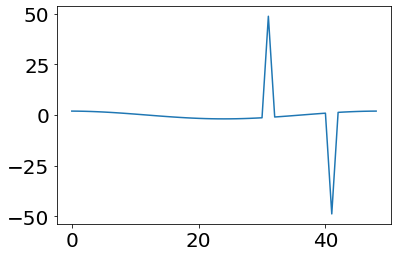

In [ ]:
# x = (12+M*np.sin(theta))%L
# y = (12+M*np.cos(theta))%L
plt.plot(np.diff(x))

# Imitation + Migration: pcp,pce,cr

In [16]:
from  matplotlib.colors import LinearSegmentedColormap, ListedColormap
c = ["darkred","red","lightcoral","white", "palegreen","green","darkgreen"]
v = [0,.15,.4,.5,0.6,.9,1.]
l = list(zip(v,c))
cmap=LinearSegmentedColormap.from_list('rg',l, N=256)

In [17]:
Runs = 100
M = [2,3,4,5,6,7,8,9,10]
T=200
folder = 'Full Sims/Mutation/'
pcp = np.concatenate((np.loadtxt(folder+'pcp D=30 d.csv').reshape(Runs,len(M),T+1),
                      np.loadtxt(folder+'pcp D=30 f.csv').reshape(Runs,len(M),T+1),
                      np.loadtxt(folder+'pcp D=30 g.csv').reshape(Runs,len(M),T+1)),axis=0)
pce = np.concatenate((np.loadtxt(folder+'pce D=30 d.csv').reshape(Runs,len(M),T+1),
                      np.loadtxt(folder+'pce D=30 f.csv').reshape(Runs,len(M),T+1),
                      np.loadtxt(folder+'pce D=30 g.csv').reshape(Runs,len(M),T+1)),axis=0)
cr = np.concatenate((np.loadtxt(folder+'cr D=30 d.csv').reshape(Runs,len(M),T+1),
                     np.loadtxt(folder+'cr D=30 f.csv').reshape(Runs,len(M),T+1),
                     np.loadtxt(folder+'cr D=30 g.csv').reshape(Runs,len(M),T+1)),axis=0)

# pcp = np.loadtxt(folder+'pcp D=6.csv').reshape(Runs,len(M),T+1)
# pce = np.loadtxt(folder+'pce D=6.csv').reshape(Runs,len(M),T+1)
# cr = np.loadtxt(folder+'cr D=6.csv').reshape(Runs,len(M),T+1)

# pcp = np.loadtxt(folder+'pcp D=30 c.csv').reshape(Runs,len(M),T+1)
# pce = np.loadtxt(folder+'pce D=30 c.csv').reshape(Runs,len(M),T+1)
# cr = np.loadtxt(folder+'cr D=30 c.csv').reshape(Runs,len(M),T+1)

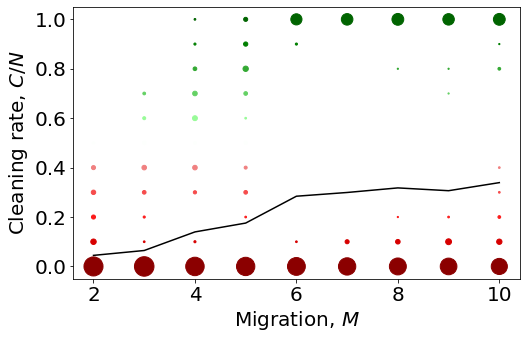

In [19]:
bins = np.arange(-0.05,1.06,0.1)
cr_freq = [np.histogram(cr[:,i,-1],bins=bins) for i in range(9)]

fig=plt.figure(figsize=(8,5))

# plt.errorbar(M,[np.mean(cr[:,i,-1][cr[:,i,-1]>0]) for i in range(len(M))],
#              yerr=[np.std(cr[:,i,-1][cr[:,i,-1]>0]) for i in range(len(M))],marker='o',color='green',markersize=10)

# plt.errorbar(M, np.mean(cr[:,:,-1],axis=0), yerr=np.std(cr[:,:,-1],axis=0),marker='o',color='red',markersize=10)
for i,m in (enumerate(M)):
    plt.scatter([m]*11,np.arange(0,1.1,0.1),s=1.5*cr_freq[i][0],
                c=np.arange(0,1.1,0.1),marker='o',cmap=cmap)     # distribution by color
    # plt.scatter([m]*11,np.arange(0,1.1,0.1),c=cr_freq[i][0],
    #             s=50,marker='o',cmap='viridis')

    
plt.plot(M,np.mean(cr[:,:,-1],axis=0),color='k')


plt.xlabel("Migration, $M$")
plt.ylabel("Cleaning rate, $C/N$")
# plt.ylim([0,1])
# plt.xlim([2,10])

fig.savefig('Manuscript/Cleaning rate epsilon001.png',bbox_inches='tight')

## smoothing over last 20 timesteps

Text(0, 0.5, 'Cleaning rate, $C/N$')

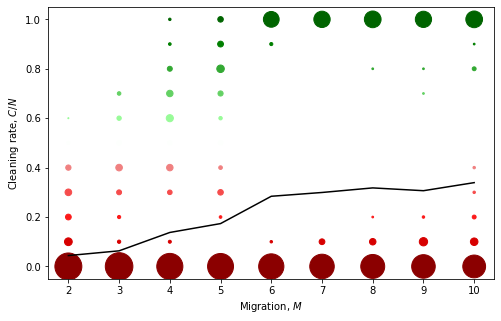

In [6]:
bins = np.arange(-0.05,1.06,0.1)
cr_freq = [np.histogram(cr[:,i,-20:],bins=bins) for i in range(9)]
fig=plt.figure(figsize=(8,5))

# plt.errorbar(M,[np.mean(cr[:,i,-1][cr[:,i,-1]>0]) for i in range(len(M))],
#              yerr=[np.std(cr[:,i,-1][cr[:,i,-1]>0]) for i in range(len(M))],marker='o',color='green',markersize=10)

# plt.errorbar(M, np.mean(cr[:,:,-1],axis=0), yerr=np.std(cr[:,:,-1],axis=0),marker='o',color='red',markersize=10)
for i,m in (enumerate(M)):
    plt.scatter([m]*11,np.arange(0,1.1,0.1),s=3*cr_freq[i][0]/20,
                c=np.arange(0,1.1,0.1),marker='o',cmap=cmap)     # distribution by color
    # plt.scatter([m]*11,np.arange(0,1.1,0.1),c=cr_freq[i][0],
    #             s=50,marker='o',cmap='viridis')

    
plt.plot(M,np.mean(cr[:,:,-20:],axis=(0,2)),color='k')


plt.xlabel("Migration, $M$")
plt.ylabel("Cleaning rate, $C/N$")
# plt.ylim([0,1])
# plt.xlim([2,10])

# fig.savefig('Manuscript/Cleaning rate epsilon 001 smoothed20.png',bbox_inches='tight')

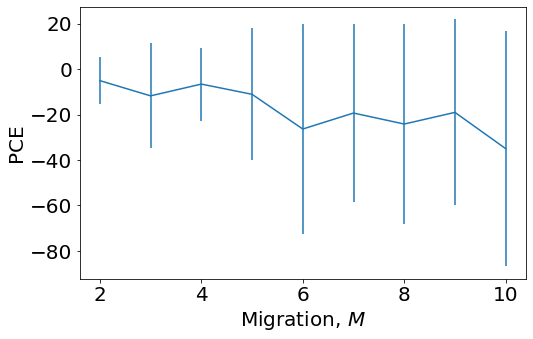

In [131]:
# plt.errorbar(M,[np.mean(pce[:,i,-1][cr[:,i,-1]>0]) for i in range(len(M))],
#              yerr=[np.std(pce[:,i,-1][cr[:,i,-1]>0]) for i in range(len(M))])

fig=plt.figure(figsize=(8,5))
plt.errorbar(M, np.mean(pce[:,:,-20:],axis=(0,2)), yerr=np.std(pce[:,:,-20:],axis=(0,2)))
plt.xlabel('Migration, $M$')
plt.ylabel('PCE')
fig.savefig('Manuscript/PCE smoothed20.png',bbox_inches='tight')

## time evolution

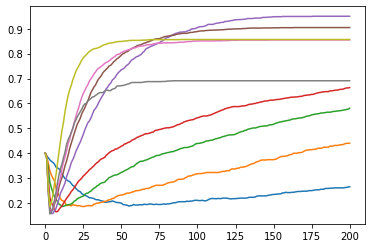

In [7]:
for i,m in enumerate(M):
    # plt.plot(cr[:,i,:].mean(axis=0))
    
    plt.plot(range(T+1),np.mean([cr[r,i,:] for r in range(Runs) if cr[r,i,-1]>0],axis=0))

Text(0, 0.5, 'Cleaning rate, $C/N$')

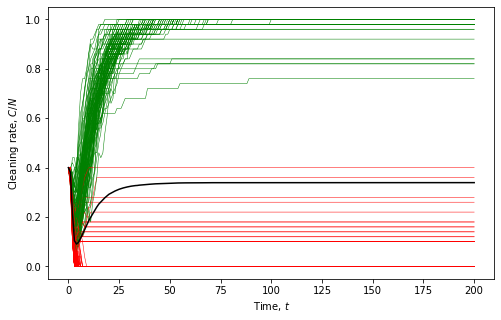

In [12]:
fig=plt.figure(figsize=(8,5))
for r in range(3*Runs):
    c = 'r'
    if cr[r,-1,-1]>=0.5:
        c='g'
    plt.plot(range(T+1),cr[r,-1,:],c=c,lw=0.5)
    
plt.plot(range(T+1),cr[:,-1,:].mean(axis=0),color='k')
plt.xlabel('Time, $t$')
plt.ylabel('Cleaning rate, $C/N$')
# fig.savefig('Manuscript/Cleaning evolution M=10.png',bbox_inches='tight')

## pce

In [8]:
print(np.min(pce[:,:,-1]-pce[:,:,0]))
print(np.max(pce[:,:,-1]-pce[:,:,0]))

-16.600661814982402
1.709896254399196


In [10]:
bins = np.arange(-17,2.1,2)
bin_centers = np.arange(-16,1.1,2)
pce_freq = [np.histogram(pce[:,i,-1],bins=bins) for i in range(9)]
print(pce_freq[2][0])

[  8  13  16  11  13   8   0 230   0]


(-17.0, 1.0)

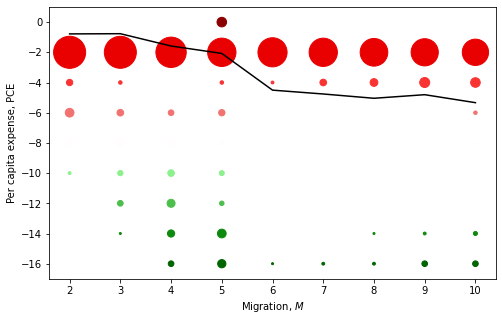

In [11]:
fig=plt.figure(figsize=(8,5))

# plt.errorbar(M,[np.mean(cr[:,i,-1][cr[:,i,-1]>0]) for i in range(len(M))],
#              yerr=[np.std(cr[:,i,-1][cr[:,i,-1]>0]) for i in range(len(M))],marker='o',color='green',markersize=10)

# plt.errorbar(M, np.mean(cr[:,:,-1],axis=0), yerr=np.std(cr[:,:,-1],axis=0),marker='o',color='red',markersize=10)
for i,m in (enumerate(M)):
    plt.scatter([m]*len(bin_centers),bin_centers,s=4*pce_freq[i][0],
                c=bin_centers,marker='o',cmap=cmap.reversed())     # distribution by color
    # plt.scatter([m]*11,np.arange(0,1.1,0.1),c=cr_freq[i][0],
    #             s=50,marker='o',cmap='viridis')

    
plt.plot(M,np.mean(pce[:,:,-1]-pce[:,:,0],axis=0),color='k')


plt.xlabel("Migration, $M$")
plt.ylabel("Per capita expense, PCE")
plt.ylim([-17,1])
# plt.xlim([2,10])

# fig.savefig('Manuscript/PCE change epsilon001.png',bbox_inches='tight')

# Density

In [10]:
folder = 'Full Sims/Density/'
Runs=200
M = range(2,11)
N = range(5,105,5)#[5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,100]

cr = np.concatenate([np.loadtxt(folder+f'cr N={n} runs={Runs}.csv').reshape(Runs,len(M),1)
                     for n in N],axis=2)
pcp = np.concatenate([np.loadtxt(folder+f'pcp N={n} runs={Runs}.csv').reshape(Runs,len(M),1)
                     for n in N],axis=2)
pce = np.concatenate([np.loadtxt(folder+f'pce N={n} runs={Runs}.csv').reshape(Runs,len(M),1)
                     for n in N],axis=2)
font = {        'size'   : 20}
mpl.rc('font', **font)

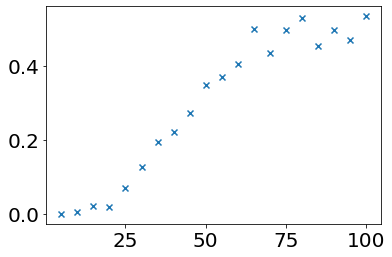

In [11]:
plt.scatter(N,cr.mean(axis=0)[-1,:],marker='x') # with some 200 runs

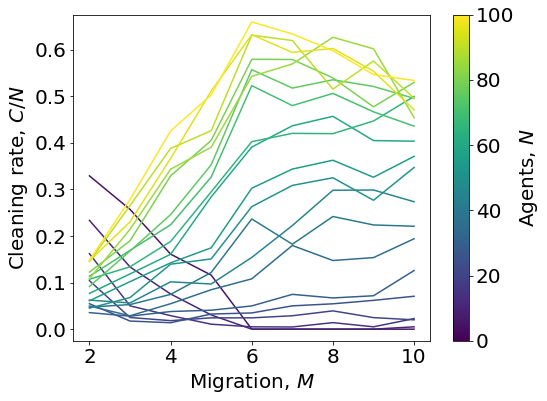

In [12]:
# import matplotlib
fig=plt.figure(figsize=(8,6))
cmap = matplotlib.cm.get_cmap('viridis')
for i in range(len(N)):
    plt.plot(M,cr.mean(axis=0)[:,i],color=cmap(N[i]/100))#,label=f'N={N[i]}')
plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, 
                                   norm=matplotlib.colors.Normalize(vmin=0, vmax=100)),
             label='Agents, $N$')
# marker=['s','o']
# ms_to_plot = [0,-1]
# color = ['orange','dodgerblue']
# for i in range(2):
#     plt.plot(M,cr.mean(axis=0)[:,ms_to_plot[i]],
#              color=color[i],label=f'N={N[ms_to_plot[i]]}',
#              marker=marker[i],markersize=10)
# plt.legend()
plt.xlabel(r'Migration, $M$')
plt.ylabel(r'Cleaning rate, $C/N$')
plt.ylim([-0.025,0.675])
fig.savefig('CR against M.png',bbox_inches='tight')

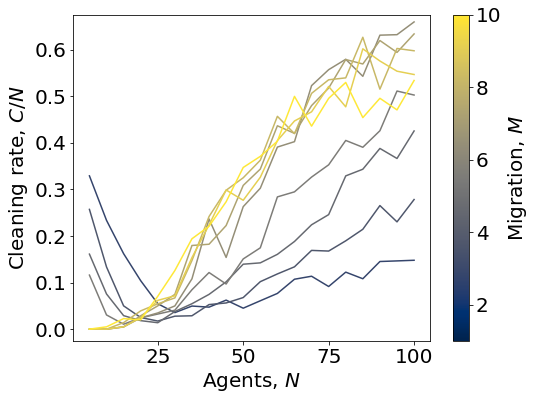

In [13]:
# import matplotlib
fig=plt.figure(figsize=(8,6))
cmap = matplotlib.cm.get_cmap('cividis')
for i in range(len(M)):
    plt.plot(N,cr.mean(axis=0)[i,:],color=cmap(M[i]/10))#,label=f'N={N[i]}')
# plt.legend()
plt.colorbar(plt.cm.ScalarMappable(cmap=cmap, 
                                   norm=matplotlib.colors.Normalize(vmin=1, vmax=10)),
             label='Migration, $M$')
plt.xlabel(r'Agents, $N$')
plt.ylabel(r'Cleaning rate, $C/N$')
plt.ylim([-0.025,0.675])
fig.savefig('CR against N.png',bbox_inches='tight')

In [8]:
# N_corners = np.insert(np.array(N,dtype=float),18,90)
# N_corners[:18] = N_corners[:18]-2.5
# N_corners[18:] = N_corners[18:]+5
N_corners = np.arange(2.5,105,5)
print(N_corners)

M_corners = np.insert(np.array(M,dtype=float),0,1) + 0.5
print(M_corners)

N_mesh,M_mesh = np.meshgrid(N_corners,M_corners)

[  2.5   7.5  12.5  17.5  22.5  27.5  32.5  37.5  42.5  47.5  52.5  57.5
  62.5  67.5  72.5  77.5  82.5  87.5  92.5  97.5 102.5]
[ 1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5]


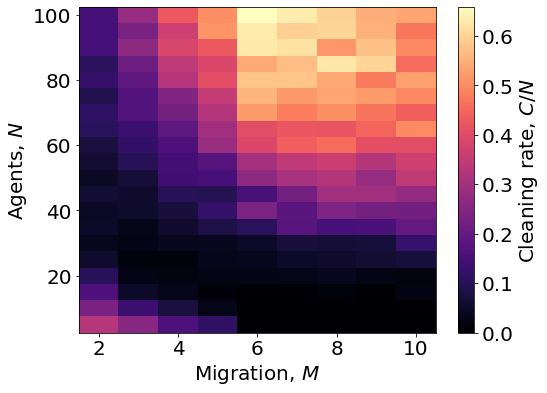

In [14]:
fig,ax=plt.subplots(figsize=(8,6))
im=ax.pcolormesh(M_mesh,N_mesh,cr.mean(axis=0),cmap='magma')#,vmin=0,vmax=1)
ax.set_xlabel(r"Migration, $M$")
ax.set_ylabel(r"Agents, $N$")
plt.colorbar(im,label=r'Cleaning rate, $C/N$')

fig.savefig("Density heatmap.png",bbox_inches='tight')

## sigmoid fit

In [15]:
from scipy.optimize import least_squares

In [16]:
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + np.exp(-k*(np.array(x)-x0))) + b
    return (y)

def residual(params, x, data):
    model = sigmoid(x,params[0],params[1],params[2],params[3])
    return (data-model)

[ 5.34404778e-01  4.09804619e+01  8.86158291e-02 -2.87043281e-02]


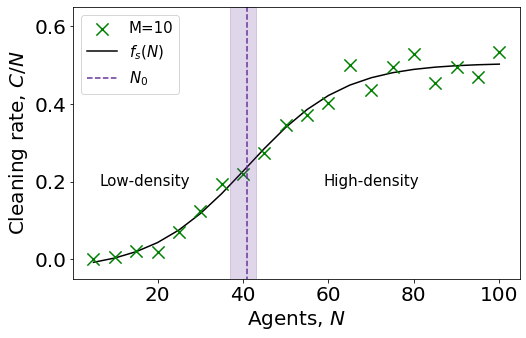

In [17]:
fig=plt.figure(figsize=(8,5))

R = 6
L = 50

i = -1
j = -1
y = cr.mean(axis=0)[i,:]
yerr = cr.std(axis=0)[i,:]
y1 = cr.mean(axis=0)[j,:]
yerr1 = cr.std(axis=0)[j,:]
out = least_squares(residual,[0.56,40,0.08,0],args=(N,y))
l,x0,k,b=out.x
# print(out.x)
# print(out.cost)

plt.scatter(N,y,marker='x',label=f'M={M[i]}',zorder=1,s=150,color='green')
# plt.errorbar(N,y,yerr=yerr,label=f'M={M[i]}',zorder=1,ms=100)
plt.plot(N,sigmoid(np.array(N),l,x0,k,b),c='k',zorder=0,label=r'$f_s(N)$')


# plt.plot([(L/R)**2/math.pi]*2,[-0.1,1],'k:',label=r'$N=\frac{L^2}{\pi R^2}$')
# plt.plot([(L/R)**2/math.pi/0.6]*2,[-0.1,1],ls=':',color='rebeccapurple',label=r'$N_*^-$')
plt.plot([x0]*2,[-0.1,1],ls='--',color='rebeccapurple',label=r'$N_0$')
# plt.plot([L**2/(0.6*(11**2-6*4))]*2,[-0.1,1],ls='--',color='rebeccapurple',label=r'$N_*^+$')

plt.axvspan((L/R)**2/math.pi/0.6,L**2/(0.6*(11**2-6*4)),color='rebeccapurple',alpha=0.2)

if j != i:
    plt.scatter(N,y1,marker='x',label=f'M={M[j]}',size=100)
    out1 = least_squares(residual,[0.5,37,0.1,0],args=(N,y1))
    L1,x01,k1,b1=out1.x
    plt.plot(N,sigmoid(np.array(N),L1,x01,k1,b1),c='k')

plt.legend(fontsize=15)

plt.ylim([-0.05,0.65])
plt.xlabel("Agents, $N$")
plt.ylabel("Cleaning rate, $C/N$")

plt.annotate('Low-density',[17,0.2],fontsize=15,
             horizontalalignment='center',verticalalignment='center')#,
             # bbox=dict(fc="white", ec="black", lw=0.5,boxstyle='round'))
plt.annotate('High-density',[70,0.2],fontsize=15,
             horizontalalignment='center',verticalalignment='center')

print(out.x)
# print(out1.cost)
fig.savefig(f"M={M[i]} sigmoid.png",bbox_inches='tight')

In [49]:
N_star = L**2/(0.6*math.pi*R**2)
print(N_star)

N_star_disc = L**2/(0.6*(11**2-6*4))
print(N_star_disc)

36.84142201201281
42.9553264604811


In [18]:
params = {}
for i in range(len(M)):
    params[i] = least_squares(residual,[0.5,37,0.1,0],args=(N,cr.mean(axis=0)[i,:]))

In [19]:
print([params[i].x[1] for i in range(len(M))])

[37.02292982336809, 73.78335994388192, 72.64743646583402, 64.27085875309783, 55.35456454249259, 50.60054067397401, 45.91274722343187, 46.572141020539966, 40.98046214430789]


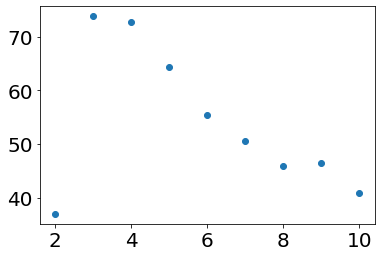

In [30]:
# plt.scatter(M,[params[i].x[0] for i in range(len(M))],label='L')
plt.scatter(M,[params[i].x[1] for i in range(len(M))],label='N_0')
# plt.scatter(M,[params[i].x[2] for i in range(len(M))],label='k')
# plt.scatter(M,[params[i].x[-1] for i in range(len(M))],label='theta')
# plt.yscale('log')

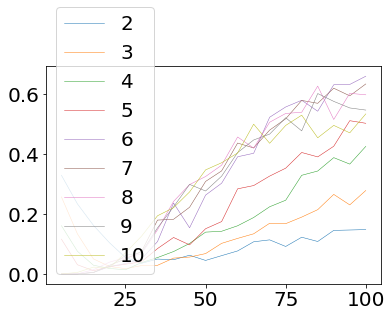

In [31]:
for i in range(len(M)):
    plt.plot(N,cr.mean(axis=0)[i,:],lw=0.5,label=M[i])
    
plt.legend()

## Copying from other exps

In [3]:
folder = 'Full Sims/Mutation/'
Runs = 100
M = [2,3,4,5,6,7,8,9,10]
T=200

cr=np.loadtxt(folder+'cr D=30 d.csv').reshape(Runs,len(M),T+1)[:,:,-1]
cra=np.loadtxt(folder+'cr D=30 f.csv').reshape(Runs,len(M),T+1)[:,:,-1]

pcp=np.loadtxt(folder+'pcp D=30 d.csv').reshape(Runs,len(M),T+1)[:,:,-1]
pcpa=np.loadtxt(folder+'pcp D=30 f.csv').reshape(Runs,len(M),T+1)[:,:,-1]

pce=np.loadtxt(folder+'pce D=30 d.csv').reshape(Runs,len(M),T+1)[:,:,-1]
pcea=np.loadtxt(folder+'pce D=30 f.csv').reshape(Runs,len(M),T+1)[:,:,-1]

In [6]:
new_folder = 'Full Sims/Density/'
np.savetxt(new_folder+f'pcp N={50}.csv',pcp.reshape((Runs,len(M))))
np.savetxt(new_folder+f'pce N={50}.csv',pce.reshape((Runs,len(M))))
np.savetxt(new_folder+f'cr N={50}.csv',cr.reshape((Runs,len(M))))

np.savetxt(new_folder+f'pcp N={50} b.csv',pcpa.reshape((Runs,len(M))))
np.savetxt(new_folder+f'pce N={50} b.csv',pcea.reshape((Runs,len(M))))
np.savetxt(new_folder+f'cr N={50} b.csv',cra.reshape((Runs,len(M))))

# Tidying i/o folder

In [4]:
## COMBINING AND SAVING THE COMBINED
folder = 'Full Sims/Density/'
Runs=100
M = range(2,11)
N = [5,10,15,20,25,30,35,40,50,60,70,80,90]
for n in N:
    np.savetxt(folder+f'cr N={n} runs={Runs*2}.csv',
               np.concatenate([np.loadtxt(folder+f'cr N={n}.csv').reshape(Runs,len(M)),
                               np.loadtxt(folder+f'cr N={n} b.csv').reshape(Runs,len(M))],
                              axis=0))
    np.savetxt(folder+f'pcp N={n} runs={Runs*2}.csv',
               np.concatenate([np.loadtxt(folder+f'pcp N={n}.csv').reshape(Runs,len(M)),
                               np.loadtxt(folder+f'pcp N={n} b.csv').reshape(Runs,len(M))],
                              axis=0))
    np.savetxt(folder+f'pce N={n} runs={Runs*2}.csv',
               np.concatenate([np.loadtxt(folder+f'pce N={n}.csv').reshape(Runs,len(M)),
                               np.loadtxt(folder+f'pce N={n} b.csv').reshape(Runs,len(M))],
                              axis=0))

In [9]:
folder = 'Full Sims/Density/'
Runs=100
M = range(2,11)
N = [5,10,15,20,25,30,35,40,50,60,70,80,90]
for n in N:
    os.remove(folder+f'cr N={n}.csv')
    os.remove(folder+f'cr N={n} b.csv')
    os.remove(folder+f'pcp N={n}.csv')
    os.remove(folder+f'pcp N={n} b.csv')
    os.remove(folder+f'pce N={n}.csv')
    os.remove(folder+f'pce N={n} b.csv')